In [75]:
from keras.datasets import mnist

In [76]:
help(mnist)

Help on module keras.datasets.mnist in keras.datasets:

NAME
    keras.datasets.mnist - MNIST handwritten digits dataset.

FUNCTIONS
    load_data(path='mnist.npz')
        Loads the MNIST dataset.
        
        This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
        along with a test set of 10,000 images.
        More info can be found at the
        [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
        
        Args:
          path: path where to cache the dataset locally
            (relative to `~/.keras/datasets`).
        
        Returns:
          Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
        
        **x_train**: uint8 NumPy array of grayscale image data with shapes
          `(60000, 28, 28)`, containing the training data. Pixel values range
          from 0 to 255.
        
        **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
          with shape `(60000,)` for the training data.
        
     

In [77]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [78]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'get_file',
 'keras_export',
 'load_data',
 'np']

In [79]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [80]:
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

<Figure size 432x288 with 0 Axes>

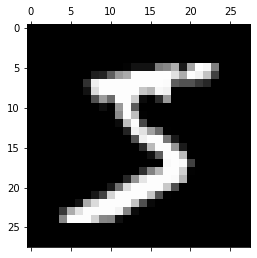

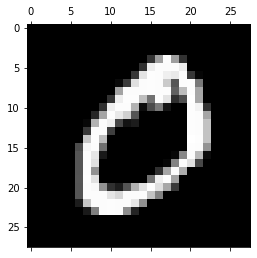

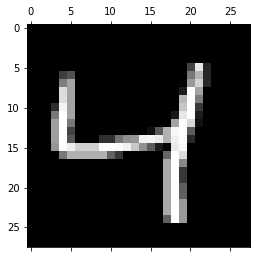

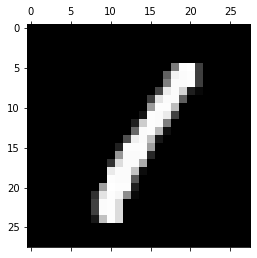

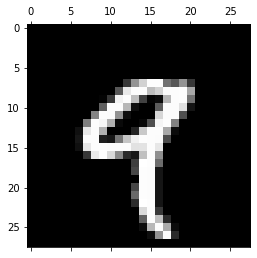

In [81]:
plt.gray()
for i in range(5):
  plt.matshow(x_train[i])

In [82]:
# Reshape dataset to have a single channel
import keras.backend as k
img_rows, img_cols = 28, 28

if k.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  inp_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  inp_shape = (img_rows, img_cols, 1)

In [83]:
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [84]:
print(inp_shape)

(28, 28, 1)


In [85]:
x_train.dtype

dtype('uint8')

In [86]:
# convert to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# scaling
x_train = x_train/255
x_test = x_test/255

In [87]:
y_train.shape

(60000,)

In [88]:
import numpy as np

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [89]:
import pandas as pd

y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [90]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [94]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=inp_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(units=256, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [95]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [96]:
model.fit(x_train, y_train, epochs=10, batch_size=500)

Epoch 1/10
120/120 [==============================] - 39s 317ms/step - loss: 0.5811 - accuracy: 0.8322
Epoch 2/10
120/120 [==============================] - 38s 316ms/step - loss: 0.1244 - accuracy: 0.9639
Epoch 3/10
120/120 [==============================] - 38s 315ms/step - loss: 0.0866 - accuracy: 0.9751
Epoch 4/10
120/120 [==============================] - 38s 315ms/step - loss: 0.0685 - accuracy: 0.9801
Epoch 5/10
120/120 [==============================] - 38s 315ms/step - loss: 0.0553 - accuracy: 0.9843
Epoch 6/10
120/120 [==============================] - 38s 315ms/step - loss: 0.0471 - accuracy: 0.9864
Epoch 7/10
120/120 [==============================] - 38s 315ms/step - loss: 0.0403 - accuracy: 0.9887
Epoch 8/10
120/120 [==============================] - 38s 315ms/step - loss: 0.0365 - accuracy: 0.9896
Epoch 9/10
120/120 [==============================] - 38s 314ms/step - loss: 0.0313 - accuracy: 0.9911
Epoch 10/10
120/120 [==============================] - 38s 315ms/step - l

In [97]:
score = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 3s 8ms/step - loss: 0.0314 - accuracy: 0.9901


In [98]:
print('test loss: ', score[0])
print('test accuracy: ', score[1])

test loss:  0.03142497316002846
test accuracy:  0.9901000261306763


In [99]:
y_pred = model.predict(x_test)

In [100]:
y_pred[0]

array([1.5739915e-06, 2.2989378e-05, 2.3281251e-05, 1.6623260e-05,
       2.6379831e-07, 3.6190517e-07, 2.9622649e-08, 9.9991393e-01,
       6.5583328e-07, 2.0356800e-05], dtype=float32)

In [101]:
np.argmax(y_pred[0])

7

In [102]:
np.argmax(y_test[0])

7

<Figure size 432x288 with 0 Axes>

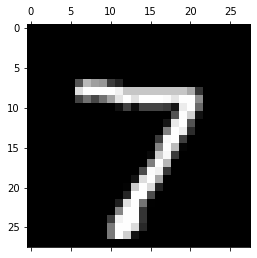

In [104]:
plt.gray()
plt.matshow(x_test[0].reshape(28,28))

In [107]:
from sklearn.metrics import confusion_matrix
y_test_max = np.argmax(y_test, axis=1)
y_pred_max = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_max, y_pred_max)
print(cm)

[[ 974    1    1    0    0    0    1    2    1    0]
 [   0 1132    1    0    0    0    1    1    0    0]
 [   2    2 1022    0    1    0    0    5    0    0]
 [   0    0    2 1003    0    3    0    0    2    0]
 [   0    0    1    1  976    0    0    0    0    4]
 [   2    0    0    4    0  882    1    1    0    2]
 [   4    2    0    0    2    5  945    0    0    0]
 [   0    3    6    2    0    0    0 1014    1    2]
 [   5    0    2    2    1    3    0    2  955    4]
 [   1    2    1    1    4    1    0    1    0  998]]


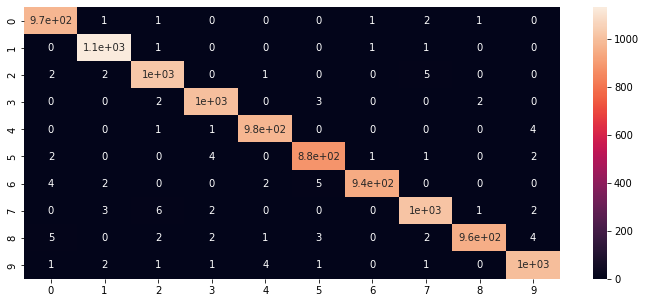

In [113]:
plt.figure(figsize=(12,5))
sns.heatmap(cm, annot=True)

In [117]:
from sklearn.metrics import classification_report
report = classification_report(y_test_max, y_pred_max)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

